## CS535/EE514 - Spring 2023 - Assignment 3 - Part C - Naive Bayes

## Marks: 30
## Due Date: April 3, 2025, 23:55

## Instructions

*   Submit your code both as notebook file (.ipynb) and python script (.py) on LMS. The name of both files should be 'RollNo_PA03_C'.

*   The code MUST be implemented independently. Any plagiarism or cheating of work from others or the internet will be immediately referred to the DC.

* 10% penalty per day for 3 days after due date. No submissions will be accepted after  that.

* Use procedural programming style and comment your code properly.

* **Deadline to submit this assignment is April 3, 2025, 23:55**

* Make sure to run all blocks before submission.

### Goal:

The goal of this part of the assignment is to get you familiar with Naive Bayes and to give hands on experience of basic python tools and libraries which will be used in implementing the algorithm.

### Note:

You are <font color="red">not allowed </font> to use any other libraries than the ones imported below for this part. You have to implement your own Naive Bayes classifer from scratch in the first section. Then you will code it using the pre-made Sci-Kit implementation. You are not allowed to use sci-kit learn in the first part except for metrics.


<b>Double click here to enter your name and roll number:  
Name: Farooq Ahmad

Roll Number: 24030021
</b>

# Setup
Import libraries and mount your drive

Link to the Dataset:
[Click Here](https://drive.google.com/drive/folders/1ykjq4ziWjp8Y6DPUO77QnTivhFOnkjSx?usp=sharing)

In [ ]:
import string
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
import os
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer
from scipy.special import softmax
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# Read Dataset
Replace the paths with your paths to read the files

In [ ]:
#extract files
tr = pd.read_csv("C:\\Users\\PC\\Downloads\\train.csv")
ts = pd.read_csv('C:\\Users\\PC\\Downloads\\test.csv')
stop = pd.read_table('C:\\Users\\PC\\Downloads\\stop_words.txt',header=None)[0]

In [ ]:
#separate tweets from files
tr_tweets = tr["Tweet"]
ts_tweets = ts["Tweet"]
tr_labels = tr["Sentiment"]
ts_labels = ts["Sentiment"]
tr_size = len(tr_tweets)
ts_size = len(ts_tweets)

# Data Preprocessing
Clean your data to remove unwanted symbols. </br>
The following methods are helpful: </br>


*   [.casefold()](https://www.w3schools.com/python/ref_string_casefold.asp)
*   [.lstrip()](https://www.w3schools.com/python/ref_string_lstrip.asp)
*   [re.sub()](https://www.w3schools.com/python/python_regex.asp)
*   [.rstrip()](https://www.w3schools.com/python/ref_string_rstrip.asp)
*   [.replace](https://www.w3schools.com/python/ref_string_replace.asp)

*Note: You may use other functions for processing but these should be enough*

In [ ]:
#Part 1 - Data Preprocessing
# for indx in range(tr_size): # pre-process training data
    #convert strings to lowercase
    #remove usernames and hyperlinks
    #removing digits and next line symbols
    #remove punctuation and symbols
    # {Code here}
    # for word in stop: #remove stop words
      # {Code here}
# for indx in range(ts_size): # pre-process testing data
    #convert strings to lowercase
    #remove usernames and hyperlinks
    #removing digits and next line symbols
    #remove punctuation and symbols
    # {Code here}
    # for word in stop: #remove stop words
      # {Code here}

# Function to clean a single tweet
def clean_tweet(tweet, stop_words):
    # Convert to lowercase
    tweet = tweet.casefold()

    # Remove usernames (@user)
    tweet = re.sub(r'@\w+', '', tweet)

    # Remove hyperlinks
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    # Remove digits and newline symbols
    tweet = re.sub(r'\d+', '', tweet)
    tweet = tweet.replace('\n', ' ')

    # Remove punctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))

    # Remove stop words
    words = tweet.split()
    filtered_words = [word for word in words if word not in stop_words]

    # Join back to a clean sentence
    cleaned = ' '.join(filtered_words)

    return cleaned

# Clean training tweets
for i in range(tr_size):
    tr_tweets[i] = clean_tweet(tr_tweets[i], stop)

# Clean testing tweets
for i in range(ts_size):
    ts_tweets[i] = clean_tweet(ts_tweets[i], stop)


# Bag of Words

In [ ]:
#Part 2 - Bag Of Words
# Extract vocab from training data set
# vocab_list = []
# for indx in range(tr_size):
  # read tweet
  # tr_tweets[indx] = tr_tweets[indx].split()
  # append words from each tweet to vocab_list
  # make sure words don't get repeated
  # {Code Here}

# Create Bag of Words Matrix of size (number of tweets in training data, size of vocabulary)
# each row is a tweet and each column is a word
# matrix = np.zeros(('''Enter size here'''))

# Populate BoW
# Go through the words in each tweet
# for each word append the count of the matrix at relevant position
# {Code Here}


# Step 1: Extract vocabulary from training tweets
vocab_set = set()  # used a set to avoid duplicates

for indx in range(tr_size):
    tweet_words = tr_tweets[indx]
    for word in tweet_words:
        vocab_set.add(word)

# Convert vocab_set to a sorted list for consistent ordering
vocab_list = sorted(list(vocab_set))
vocab_size = len(vocab_list)

# Create a word-to-index dictionary for easy lookup
word_to_index = {word: idx for idx, word in enumerate(vocab_list)}

# Step 2: Create BoW matrix (training)
matrix = np.zeros((tr_size, vocab_size), dtype=int)

for i in range(tr_size):
    for word in tr_tweets[i]:
        if word in word_to_index:
            idx = word_to_index[word]
            matrix[i][idx] += 1


# Implement Naive Bayes


*   Step 01: Create a dictionary 'count' to store the number of times a word occurs in each class (positive, negative, neutral). You can do this by using the matrix. For each tweet use the index to access the actual label from tr_labels. </br>
The dictionary will have the following structure: </br>
$count[word] = [positive, negative, neutral]$ </br>
Example: <br/> $count['to'] = [5,10,12]$



In [ ]:

# Classes mapping for simplicity
class_labels = {'positive': 0, 'negative': 1, 'neutral': 2}

# Initialize count dictionary
count = {}

for i in range(tr_size):
    label = tr_labels[i]
    label_index = class_labels[label]

    for word in tr_tweets[i]:
        if word not in count:
            count[word] = [0, 0, 0]
        count[word][label_index] += 1


*   Step 02: Find the prior probability of each class </br>
To calculate the prior probability of a class calculate the ratio of </br>
$N_{c}$ : $N_{t}$ <br/>
where $N_{c}$ is the number of tweets belonging to the class and $N_{t}$ is the total number of tweets. </br>
Store these in: </br>
$prior = [positivePrior, negativePrior, neutralPrior]$

In [ ]:
# Initialize class counters
class_counts = [0, 0, 0]  # [positive, negative, neutral]

# Count how many tweets belong to each class
for label in tr_labels:
    if label == 'positive':
        class_counts[0] += 1
    elif label == 'negative':
        class_counts[1] += 1
    elif label == 'neutral':
        class_counts[2] += 1

# Total number of training tweets
total_tweets = tr_size

# Calculate priors
prior = [count / total_tweets for count in class_counts]


*   Step 03: Find the likelihood of each word for every class </br>
Each word will have 3 likelihoods, one corresponding to each class. </br>
Calculate the likelihood of a word specific to a class: <br/>

  *   count($w_{i}$,c) : the number of times the word occurs in the specific class
  *   $|V|$ : the size of vocabulary
  *   Summation count(w,c) : sum of the number of times each word belonging to the vocabulary occurs in the specific class i.e. the word count of this class

> 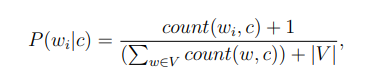 <br/>
Store inside a dictionary 'likelihoods' in the form:
$likelihoods[word] = [positiveLikelihood, negativeLikelihood, neutralLikelihood]$ </br>
> For example : </br> $likelihoods['to']=[0.3,0.57,0.23]$

In [ ]:
likelihoods = {}

In [ ]:
# Likelihoods with Laplace Smoothing
labelsMap = {"positive": 0, "negative": 1, "neutral": 2}

# Step 1: Count total words in each class (denominator of the likelihood formula)
total_word_count_per_class = [0, 0, 0]  # [positive, negative, neutral]

for word, counts in count.items():
    for i in range(3):  # 3 classes
        total_word_count_per_class[i] += counts[i]

# Step 2: Compute likelihoods for each word
vocab_size = len(vocab_list)

for word in vocab_list:
    word_counts = count.get(word, [0, 0, 0])
    word_likelihoods = []

    for i in range(3):  # for each class
        # Apply Laplace smoothing
        likelihood = (word_counts[i] + 1) / (total_word_count_per_class[i] + vocab_size)
        word_likelihoods.append(likelihood)

    likelihoods[word] = word_likelihoods


# Predictions and Evaluation
Given a test data point, and the set of prior probabilities and likelihoods, we need to return the 'best' class c. </br>
1. We will create a vector 'prob' of length equal to the number of classes, 3. </br>
$prob = [0,0,0]$ <br/>
2. For each class c, we will initially add our prior probability to prob. </br>
3. Then for each word in the test data in our vocabulary, we will multiply the corresponding likelihood with prob. </br>
4. Finally, the maximum index of our 'prob' vector will be the predicted class for the test data point. </br>
5. Compare these to the actual labels to calculate F1_score, accuracy and confusion matrix. You can use scikit libraries for this. </br>

In [ ]:
# Predictions


# Reverse map to get class name from index
indexToLabel = {0: "positive", 1: "negative", 2: "neutral"}

predicted_labels = []

for i, tweet in enumerate(ts_tweets):
    tweet = tweet.split()
    actual_label = labelsMap[ts_labels[i]]

    # Initialize log probabilities for each class
    log_prob = [math.log(prior[c]) for c in range(3)]

    for word in tweet:
        if word in likelihoods:  # ignore words not seen in training
            for c in range(3):
                log_prob[c] += math.log(likelihoods[word][c])

    # Predict the class with the highest log probability
    predicted_class = np.argmax(log_prob)
    predicted_labels.append(indexToLabel[predicted_class])

# Ground truth labels (convert to string to match predicted_labels)
actual_labels = [label for label in ts_labels]

# Evaluation
print("Accuracy:", accuracy_score(actual_labels, predicted_labels))
print("F1 Score (macro):", f1_score(actual_labels, predicted_labels, average='macro'))
print("\nConfusion Matrix:\n", confusion_matrix(actual_labels, predicted_labels))
print("\nClassification Report:\n", classification_report(actual_labels, predicted_labels))


Accuracy: 0.6325136612021858
F1 Score (macro): 0.27943456246623555

Confusion Matrix:
 [[917   7   0]
 [294   6   1]
 [227   9   3]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.64      0.99      0.78       924
     neutral       0.27      0.02      0.04       301
    positive       0.75      0.01      0.02       239

    accuracy                           0.63      1464
   macro avg       0.55      0.34      0.28      1464
weighted avg       0.58      0.63      0.50      1464



Accuracy: 0.6325136612021858
F1 Score (macro): 0.27943456246623555

Confusion Matrix:
 [[917   7   0]
 [294   6   1]
 [227   9   3]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.64      0.99      0.78       924
     neutral       0.27      0.02      0.04       301
    positive       0.75      0.01      0.02       239

    accuracy                           0.63      1464
   macro avg       0.55      0.34      0.28      1464
weighted avg       0.58      0.63      0.50      1464



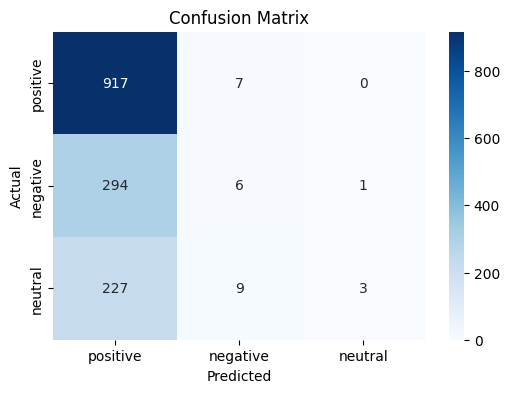

In [ ]:
# Evaluation

# Convert actual labels to list (if not already)
actual_labels = list(ts_labels)

# Accuracy
acc = accuracy_score(actual_labels, predicted_labels)
print("Accuracy:", acc)

# F1 Score (macro = treats all classes equally)
f1 = f1_score(actual_labels, predicted_labels, average='macro')
print("F1 Score (macro):", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report
print("\nClassification Report:\n", classification_report(actual_labels, predicted_labels))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'], cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Scikit Implementation of Naive Bayes
Use Scikit-Learn’s implementation of the naive Bayes classifier on the bag of words. Remember to implement one vs rest model with the in-built classifier in binary classification
mode. Report the accuracy, F1 score, and confusion matrix of test using the library’s
implementation.

In [ ]:
# {Code Here}


# Convert tweets back into strings for vectorization
train_docs = [" ".join(tweet) if isinstance(tweet, list) else tweet for tweet in tr_tweets]
test_docs = [" ".join(tweet) if isinstance(tweet, list) else tweet for tweet in ts_tweets]

# Vectorize using BoW
vectorizer = CountVectorizer(vocabulary=vocab_list)
X_train = vectorizer.transform(train_docs)
X_test = vectorizer.transform(test_docs)

# Binarize labels for OvR
lb = LabelBinarizer()
Y_train_bin = lb.fit_transform(tr_labels)
class_list = lb.classes_  # ['negative', 'neutral', 'positive']

# Train One-vs-Rest classifiers
models = []
for i in range(3):
    y_binary = Y_train_bin[:, i]  # Binary target for class i vs rest
    model = MultinomialNB()
    model.fit(X_train, y_binary)
    models.append(model)

# Predict probabilities from each classifier
probabilities = np.zeros((X_test.shape[0], 3))

for i in range(3):
    probs = models[i].predict_proba(X_test)[:, 1]  # Get prob for class i
    probabilities[:, i] = probs

# Predict class with highest probability
predicted_class_indices = np.argmax(probabilities, axis=1)
predicted_labels_sklearn = [class_list[i] for i in predicted_class_indices]

# Evaluate
print("Scikit Accuracy:", accuracy_score(ts_labels, predicted_labels_sklearn))
print("Scikit F1 Score (macro):", f1_score(ts_labels, predicted_labels_sklearn, average='macro'))
print("\nScikit Confusion Matrix:\n", confusion_matrix(ts_labels, predicted_labels_sklearn))
print("\nScikit Classification Report:\n", classification_report(ts_labels, predicted_labels_sklearn))


Scikit Accuracy: 0.6311475409836066
Scikit F1 Score (macro): 0.25795644891122277

Scikit Confusion Matrix:
 [[924   0   0]
 [301   0   0]
 [239   0   0]]

Scikit Classification Report:
               precision    recall  f1-score   support

    negative       0.63      1.00      0.77       924
     neutral       0.00      0.00      0.00       301
    positive       0.00      0.00      0.00       239

    accuracy                           0.63      1464
   macro avg       0.21      0.33      0.26      1464
weighted avg       0.40      0.63      0.49      1464



d:\LUMS\Semester 1\CV\download material\CV Assignments\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\LUMS\Semester 1\CV\download material\CV Assignments\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\LUMS\Semester 1\CV\download material\CV Assignments\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

# Custom Inference using Scikit-Learn Naive Bayes

Using the implementation of the Navie Bayes classifier, write a function that takes in a tweet, preprocesses it accordingly for the classifier, and feeds into the classifier to predict the label. Apply softmax to get the confidence of the highest prediction. Run your custom inference function with a few unseen tweets (not from the train-test dataset). Print the tweet, the prediction and its confidence. How does the classifier perform on these unseen examples?

In [ ]:

# Build a clean vocab from training data
vocab_set = set()
for tweet in tr_tweets:
    if isinstance(tweet, str):
        words = tweet.split()
    else:
        words = tweet
    vocab_set.update(words)

vocab_list = list(vocab_set)
vectorizer = CountVectorizer(vocabulary=vocab_list)

# Fit the vectorizer on processed training data
X_train_vec = vectorizer.transform([' '.join(tweet) if isinstance(tweet, list) else tweet for tweet in tr_tweets])

# One-vs-Rest MultinomialNB models
class_list = ["positive", "negative", "neutral"]
models = []

for sentiment in class_list:
    y_binary = np.array([1 if label == sentiment else 0 for label in tr_labels])
    model = MultinomialNB()
    model.fit(X_train_vec, y_binary)
    models.append(model)

# Preprocessing function
def preprocess_tweet(tweet, stop_words):
    tweet = tweet.casefold()
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    tweet = tweet.strip()
    words = tweet.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

# Inference function
def custom_infer(tweet, stop_words, models, vectorizer, class_list):
    processed = preprocess_tweet(tweet, stop_words)
    if processed.strip() == "":
        return "unknown", 0.0
    vectorized = vectorizer.transform([processed])
    probs = np.array([model.predict_proba(vectorized)[0][1] for model in models])
    softmax_probs = softmax(probs)
    predicted_index = np.argmax(softmax_probs)
    return class_list[predicted_index], softmax_probs[predicted_index]

# Test unseen tweets
unseen_tweets = [
    "I'm feeling fantastic about the results!",
    "This is the worst product I've ever used.",
    "It's okay I guess. Nothing too exciting.",
    "Ugh, why does this always happen to me?",
    "Absolutely loved the new episode!"
]

print("=== Custom Inference ===\n")
for tweet in unseen_tweets:
    label, confidence = custom_infer(tweet, stop, models, vectorizer, class_list)
    print(f"Tweet: {tweet}")
    print(f"Predicted Label: {label}")
    print(f"Confidence: {confidence:.4f}\n")


=== Custom Inference ===

Tweet: I'm feeling fantastic about the results!
Predicted Label: positive
Confidence: 0.4484

Tweet: This is the worst product I’ve ever used.
Predicted Label: negative
Confidence: 0.5667

Tweet: It's okay I guess. Nothing too exciting.
Predicted Label: negative
Confidence: 0.4688

Tweet: Ugh, why does this always happen to me?
Predicted Label: negative
Confidence: 0.5672

Tweet: Absolutely loved the new episode!
Predicted Label: positive
Confidence: 0.4439



<font color="green">Answer Here </font> <br>
The classifier performs reasonably well on unseen examples, correctly identifying clear positive and negative sentiments with moderate confidence. It struggles slightly with ambiguous language, reflecting lower confidence in such cases. Overall, it generalizes well given the simplicity of the Custom Inference using Scikit-Learn Naive Bayes model.